간단한 신경망 만들기
  - 사인그래프 예측

In [82]:
import math
import torch
import matplotlib.pyplot as plt

In [83]:
# -pi ~ pi 사이에 데이터를 1000개 추출
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

In [84]:
x

tensor([-3.1416, -3.1353, -3.1290, -3.1227, -3.1164, -3.1101, -3.1039, -3.0976,
        -3.0913, -3.0850, -3.0787, -3.0724, -3.0661, -3.0598, -3.0535, -3.0473,
        -3.0410, -3.0347, -3.0284, -3.0221, -3.0158, -3.0095, -3.0032, -2.9969,
        -2.9906, -2.9844, -2.9781, -2.9718, -2.9655, -2.9592, -2.9529, -2.9466,
        -2.9403, -2.9340, -2.9278, -2.9215, -2.9152, -2.9089, -2.9026, -2.8963,
        -2.8900, -2.8837, -2.8774, -2.8711, -2.8649, -2.8586, -2.8523, -2.8460,
        -2.8397, -2.8334, -2.8271, -2.8208, -2.8145, -2.8083, -2.8020, -2.7957,
        -2.7894, -2.7831, -2.7768, -2.7705, -2.7642, -2.7579, -2.7516, -2.7454,
        -2.7391, -2.7328, -2.7265, -2.7202, -2.7139, -2.7076, -2.7013, -2.6950,
        -2.6888, -2.6825, -2.6762, -2.6699, -2.6636, -2.6573, -2.6510, -2.6447,
        -2.6384, -2.6321, -2.6259, -2.6196, -2.6133, -2.6070, -2.6007, -2.5944,
        -2.5881, -2.5818, -2.5755, -2.5693, -2.5630, -2.5567, -2.5504, -2.5441,
        -2.5378, -2.5315, -2.5252, -2.51

In [85]:
# y = ax^3 + bx^2 + cx + d
# 계수 또는 가중치  a b c d

- 가중치 초기화

In [86]:
a,b,c,d = torch.randn(()),torch.randn(()),torch.randn(()),torch.randn(())

- 함수를 정의 (3차원 방정식)

In [87]:
y_random = a*x**3 + b*x**2 + c*x + d

In [88]:
type(x), type(y)

(torch.Tensor, torch.Tensor)

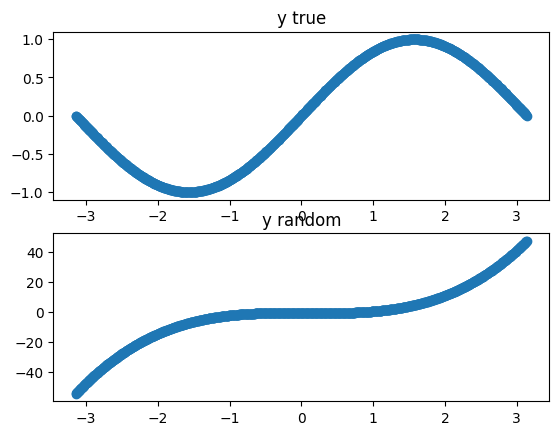

In [89]:
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x.numpy(),y.numpy(),'o')

plt.subplot(2,1,2)
plt.title('y random')
plt.plot(x.numpy(),y_random.numpy(),'o')

plt.show()

- 학습
  - 가중치 a에 대한 기울기

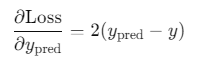

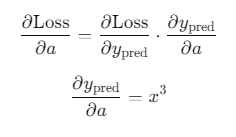

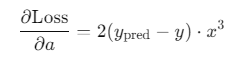

In [90]:
from logging import logProcesses
learning_rate = 1e-6
for epoch in range(3000):  # 학습 2000번 수행
    y_pred = a*x**3 + b*x**2 + c*x + d  #  예측값
    # 회귀는 기본 손실함수
    loss = (y_pred - y).pow(2).sum().item()  # 손실함수
    # 출력
    if (epoch+1) % 100 == 0:
        print(f"epoch : {epoch+1} loss:{loss}")
    # 손실함수에 대한 미분 : 기울기 구하기
    grad_y_pred = 2 * (y_pred - y)

    # 각 가중치(계수)에 대한 기울기 구함  - 역전파
    grad_a = (grad_y_pred * x**3).sum()
    grad_b = (grad_y_pred * x**2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()
    #  적용
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d



epoch : 100 loss:1034.1021728515625
epoch : 200 loss:845.8944091796875
epoch : 300 loss:692.8992919921875
epoch : 400 loss:567.8208618164062
epoch : 500 loss:465.548828125
epoch : 600 loss:381.91119384765625
epoch : 700 loss:313.5015869140625
epoch : 800 loss:257.5378112792969
epoch : 900 loss:211.74752807617188
epoch : 1000 loss:174.27505493164062
epoch : 1100 loss:143.60377502441406
epoch : 1200 loss:118.49464416503906
epoch : 1300 loss:97.93513488769531
epoch : 1400 loss:81.09757995605469
epoch : 1500 loss:67.30557250976562
epoch : 1600 loss:56.005882263183594
epoch : 1700 loss:46.74639129638672
epoch : 1800 loss:39.15715408325195
epoch : 1900 loss:32.93550109863281
epoch : 2000 loss:27.83391571044922
epoch : 2100 loss:23.649904251098633
epoch : 2200 loss:20.21758270263672
epoch : 2300 loss:17.40129280090332
epoch : 2400 loss:15.089959144592285
epoch : 2500 loss:13.192605972290039
epoch : 2600 loss:11.634673118591309
epoch : 2700 loss:10.35519027709961
epoch : 2800 loss:9.3040857315

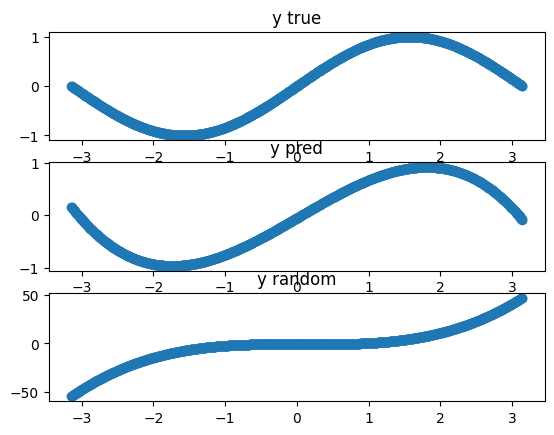

In [91]:
plt.subplot(3,1,1)
plt.title('y true')
plt.plot(x.numpy(),y.numpy(),'o')

plt.subplot(3,1,2)
plt.title('y pred')
plt.plot(x,y_pred,'o')


plt.subplot(3,1,3)
plt.title('y random')
plt.plot(x.numpy(),y_random.numpy(),'o')


plt.show()

보스턴 집값 예측

In [92]:
# from sklearn.datasets import load_boston

In [118]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [119]:
df = pd.DataFrame(data, columns=
['CRIM',
'ZN'   ,
'INDUS' ,
'CHAS'   ,
'NOX'     ,
'RM'      ,
'AGE'     ,
'DIS'     ,
'RAD'     ,
'TAX'     ,
'PTRATIO' ,
'B'       ,
'LSTAT'   ]
)
df['target'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


선형회귀를 위한 MLP 모델 설계

In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.adam import Adam   # 역전파 적용

In [121]:
# 모델 정의
model = nn.Sequential(
      nn.Linear(13,100),
      nn.ReLU(),
      nn.Linear(100,100),
      nn.ReLU(),
      nn.Linear(100,1)
)
x = df.drop('target',axis=1).values
y = df['target'].values
x = torch.tensor(x,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)

In [122]:
batch_size = 100
learning_rate = 1e-3  # 0.001
# 가중치 적용을 위한 최적화
optim = Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(1000):
  # 배치 반복
  for i in range(len(x)//batch_size):
    start = i*batch_size
    end = start + batch_size
    x_batch = x[start:end]
    y_batch = y[start:end]

    # 기울기를 초기화
    optim.zero_grad()
    # 예측값
    y_pred = model(x_batch)
    # 손실함수
    loss = F.mse_loss(y_pred,y_batch.unsqueeze(1))
    loss.backward()  # 기울기 계산
    optim.step()  # 적용
  if (epoch+1) % 10 == 0:
    print(f"epoch : {epoch+1} loss : {loss.item()}")

모델 성능 평가

In [124]:
# 모델 성능평가
with torch.no_grad():
  y_pred = model(x)
  loss = F.mse_loss(y_pred,y.unsqueeze(1))
  print(f"loss : {loss.item()}")

loss : 8.739533424377441


In [126]:
# 예측
y_pred = model(x)
y_pred = y_pred.detach().numpy()  # 텐서가 연산을 위해서 CPU OR GUP 적재되어 있는걸 꺼내서 numpy로 변경
y_pred[1] , y[1]


(array([23.534737], dtype=float32), tensor(21.6000))

결정계수를 이용한 평가
  -  0 ~1 사이의 값인데 1에 가까울수록 좋은 성능

In [127]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)  # 1에 가까울수록 좋은 성능

0.8964750075757395

동일한 모델로 다른 데이터를 예측하기

In [134]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
x = data.data
y = data.target
x = torch.tensor(x,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)
#

In [137]:
x.shape, y.shape

(torch.Size([442, 10]), torch.Size([442]))

In [151]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = torch.tensor(x,dtype=torch.float32)
x[:5], y[:5], x.shape

(tensor([[ 0.8005,  1.0655,  1.2971,  0.4598, -0.9297, -0.7321, -0.9125, -0.0545,
           0.4185, -0.3710],
         [-0.0396, -0.9385, -1.0822, -0.5535, -0.1776, -0.4029,  1.5644, -0.8303,
          -1.4366, -1.9385],
         [ 1.7933,  1.0655,  0.9345, -0.1192, -0.9587, -0.7189, -0.6802, -0.0545,
           0.0602, -0.5452],
         [-1.8724, -0.9385, -0.2438, -0.7706,  0.2563,  0.5254, -0.7576,  0.7213,
           0.4770, -0.1968],
         [ 0.1132, -0.9385, -0.7649,  0.4598,  0.0827,  0.3279,  0.1712, -0.0545,
          -0.6725, -0.9806]]),
 tensor([151.,  75., 141., 206., 135.]),
 torch.Size([442, 10]))

In [ ]:
# 모델 정의
model = nn.Sequential(
      nn.Linear(10,100),
      nn.ReLU(),
      nn.Linear(100,1)
)
batch_size = 100
learning_rate = 1e-3  # 0.001
# 가중치 적용을 위한 최적화
optim = Adam(model.parameters(), lr=learning_rate)
# 학습
for epoch in range(50000):
  # 배치 반복
  for i in range(len(x)//batch_size):
    start = i*batch_size
    end = start + batch_size
    x_batch = x[start:end]
    y_batch = y[start:end]

    # 기울기를 초기화
    optim.zero_grad()
    # 예측값
    y_pred = model(x_batch)
    # 손실함수
    loss = F.mse_loss(y_pred,y_batch.unsqueeze(1))
    loss.backward()  # 기울기 계산
    optim.step()  # 적용
  if (epoch+1) % 100 == 0:
    print(f"epoch : {epoch+1} loss : {loss.item()}")

# 모델 성능평가
with torch.no_grad():
  y_pred = model(x)
  loss = F.mse_loss(y_pred,y.unsqueeze(1))
  print(f"evaluation loss : {loss.item()}")

from sklearn.metrics import r2_score
print(f"r2_score : {r2_score(y,y_pred)}")  # 1에 가까울수록 좋은 성능

epoch : 100 loss : 11092.47265625
epoch : 200 loss : 5212.65185546875
epoch : 300 loss : 4017.189697265625
epoch : 400 loss : 3369.59033203125
epoch : 500 loss : 3078.494384765625
epoch : 600 loss : 2948.989990234375
